In [6]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

import env

import math
from sklearn import metrics
from random import randint

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 5)

In [3]:
dbname = "grocery_db"
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{dbname}'

#what are the tables?
pd.read_sql("SHOW TABLES", url)

,Tables_in_grocery_db
0,grocery_customers


In [41]:
df = pd.read_sql("SELECT * FROM grocery_customers", url)
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185


In [42]:
# Cluster on all or a selected subset of features
grocery_milk_fresh = df[["Grocery", "Milk", "Fresh"]]

# Make the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(grocery_milk_fresh)

# Use the scaler
grocery_milk_fresh = scaler.transform(grocery_milk_fresh)

# Make the object
dbsc = DBSCAN(eps = .10, min_samples = 20)

# Fit the object
dbsc.fit(grocery_milk_fresh)

# Now, let's add the scaled value columns back onto the dataframe
columns = ["Grocery", "Milk", "Fresh"]
scaled_columns = ["Scaled_" + column for column in columns]

In [43]:
# Save a copy of the original dataframe
original_df = df.copy()
# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(grocery_milk_fresh, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = pd.concat([df, scaled_df], axis=1)

# Assign the cluster labels. Recall that cluster labels don't have meaning
# DBSCAN makes a cluster called -1 that contains the "noise" or outliers
df['labels'] = dbsc.labels_
print(df.labels.value_counts())

 0    409
-1     31
Name: labels, dtype: int64


In [44]:
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Grocery,Scaled_Milk,Scaled_Fresh,labels
0,0,2,3,12669,9656,7561,214,2674,1338,0.081464,0.130727,0.112940,0
1,1,2,3,7057,9810,9568,1762,3293,1776,0.103097,0.132824,0.062899,0
2,2,2,3,6353,8808,7684,2405,3516,7844,0.082790,0.119181,0.056622,0
3,3,1,3,13265,1196,4221,6404,507,1788,0.045464,0.015536,0.118254,0
4,4,2,3,22615,5410,7198,3915,1777,5185,0.077552,0.072914,0.201626,0


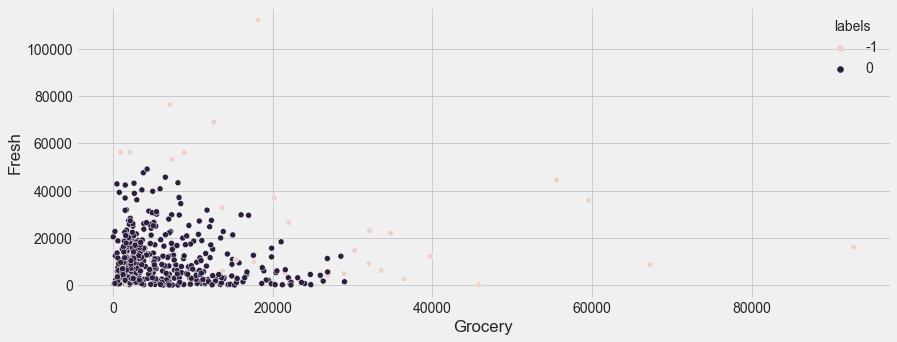

In [45]:
sns.scatterplot(df.Grocery, df.Fresh, hue=df.labels)
plt.show()

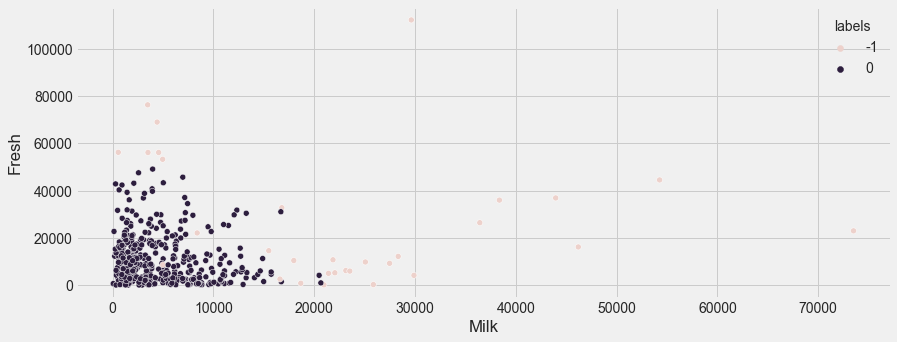

In [46]:
sns.scatterplot(df.Milk, df.Fresh, hue=df.labels)
plt.show()

Text(0.5, 0, 'Grocery')

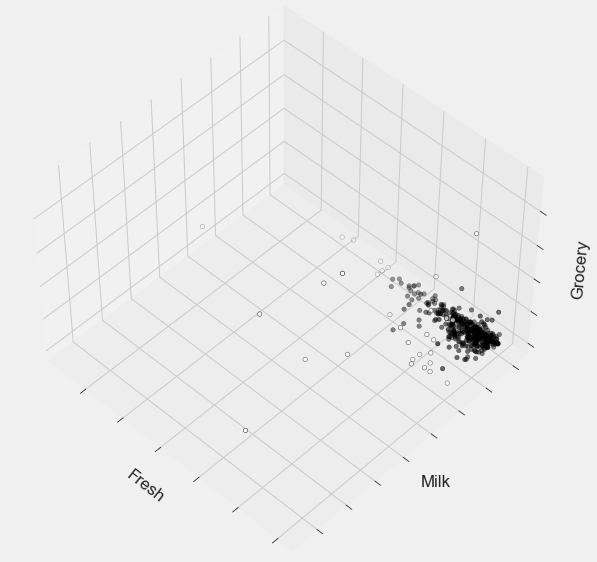

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Fresh, df.Milk, df.Grocery,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')
